# Analyse the develop of the trackers in edu websites

## 数据介绍

该数据从common project 中提取而来。收集了top 1000 edu websites中的trackers数据。Edu websites数据是提前收集好的。我们计算了教育网站的PageRank分布作为pay-level domains的ranking，然后我们用这个分布来评估第三股库的tracking capability. 

In [10]:
# 将edu_trackers 中的domain 反转
# import pandas as pd 
# edu_websites = open("educational_websites_unique.txt").read().split("\n")
# print(edu_websites[:10])

# edu_websites_reverse = list(map(lambda x: '.'.join(reversed(x.split('.'))), edu_websites))

# df_edu_websites_reverse = pd.DataFrame({"edu_reverse":edu_websites_reverse})

# df_edu_websites_reverse.to_csv("df_edu_websites_reverse.csv",header=None,index = None)
# print(df_edu_websites_reverse.head())

['iraparenting.com', 'learnthermo.com', 'plasma-therm.com', 'koreanteachers.org', 'dmwv.org', 'accuplacerpracticetest.com', 'soespanhol.com.br', 'fastlanguagemastery.com', 'stonepages.com', 'fpsct.org']
          edu_reverse
0    com.iraparenting
1     com.learnthermo
2    com.plasma-therm
3  org.koreanteachers
4            org.dmwv


In [1]:
import pandas as pd 

import glob 

def frame_construct(time):

    filenames = glob.glob('edu_trackers_{}_rank_1_new/*.csv'.format(time))
    li = []
    for filename in filenames:
        df = pd.read_csv(filename,index_col=None,header = 0)
        li.append(df)

    frame = pd.concat(li,axis = 0,ignore_index=True)
    return frame

def frame_construct_baseline(time):
    filenames = glob.glob('baseline_trackers_{}_rank_1/*.csv'.format(time))
    li = []
    for filename in filenames:
        df = pd.read_csv(filename,index_col=None,header = 0)
        li.append(df)

    frame = pd.concat(li,axis = 0,ignore_index=True)
    return frame



/Users/zhansu/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# 构建baseline的frame

frame_201407_base_origin= frame_construct_baseline('201407')
frame_201501_base_origin= frame_construct_baseline("201501")
frame_201507_base_origin= frame_construct_baseline("201507")
frame_201602_base_origin= frame_construct_baseline("201602")
frame_201607_base_origin= frame_construct_baseline("201607")
frame_201701_base_origin= frame_construct_baseline("201701")
frame_201707_base_origin= frame_construct_baseline("201707")
frame_201801_base_origin= frame_construct_baseline("201801")
frame_201807_base_origin= frame_construct_baseline("201807")
frame_201901_base_origin= frame_construct_baseline("201901")
frame_201907_base_origin= frame_construct_baseline("201907")
frame_202001_base_origin= frame_construct_baseline("202001")
frame_202007_base_origin= frame_construct_baseline("202007")
frame_202101_base_origin= frame_construct_baseline("202101")


frame_list_base_origin = [frame_201407_base_origin,frame_201501_base_origin,frame_201507_base_origin,
frame_201602_base_origin,frame_201607_base_origin,frame_201701_base_origin,frame_201707_base_origin,frame_201801_base_origin,
frame_201807_base_origin,frame_201901_base_origin,frame_201907_base_origin,frame_202001_base_origin,frame_202007_base_origin,frame_202101_base_origin]

len_list = [len(frame) for frame in frame_list_base_origin]
print(len_list)

[14032, 13776, 14399, 14517, 16471, 19429, 19645, 19068, 18973, 18391, 17837, 17204, 16794, 16230]


In [3]:
# 找出其中公共的网站
frame_base = frame_201407_base_origin
for item in frame_list_base_origin[1:]:
    frame_base = frame_base.merge(item, on = "url", how = "inner")

print(len(frame_base))
frame_base.head()




4584


/Users/zhansu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:9199: FutureWarning: Passing 'suffixes' which cause duplicate columns {'trackers_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


,url,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y
0,leduchamp.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com,google-analytics.com
1,caminoacasa.com,"facebook.com,doubleclick.net,googleadservices....","facebook.com,doubleclick.net,googleadservices....","twitter.com,facebook.com,google-analytics.com","twitter.com,doubleclick.net,facebook.com,googl...","twitter.com,doubleclick.net,facebook.com,googl...","twitter.com,doubleclick.net,facebook.com,googl...","twitter.com,doubleclick.net,facebook.com,googl...","twitter.com,facebook.com,google-analytics.com","twitter.com,facebook.com,google-analytics.com","twitter.com,facebook.com,google-analytics.com","doubleclick.net,googleadservices.com,facebook.com","doubleclick.net,googleadservices.com,facebook.com","doubleclick.net,googleadservices.com,facebook.com","doubleclick.net,googleadservices.com,facebook.com"
2,kbhome.com,"twitter.com,addthis.com,facebook.com","twitter.com,addthis.com,facebook.com","twitter.com,googleadservices.com,facebook.com","twitter.com,googleadservices.com,facebook.com","twitter.com,googleadservices.com,facebook.com","twitter.com,googleadservices.com,facebook.com","twitter.com,facebook.com","twitter.com,googleadservices.com,facebook.com","twitter.com,facebook.com","twitter.com,facebook.com","twitter.com,facebook.com","twitter.com,facebook.com","twitter.com,facebook.com,google-analytics.com","twitter.com,facebook.com"
3,fhlbdm.com,"twitter.com,google-analytics.com","twitter.com,google-analytics.com","twitter.com,google-analytics.com","twitter.com,google-analytics.com","twitter.com,google-analytics.com","twitter.com,google-analytics.com","twitter.com,google-analytics.com",twitter.com,"twitter.com,google-analytics.com","twitter.com,facebook.com","twitter.com,addthis.com,facebook.com","twitter.com,addthis.com,facebook.com","twitter.com,facebook.com","twitter.com,facebook.com"
4,europages.it,"sitestat.com,facebook.com,doubleclick.net,goog...","sitestat.com,facebook.com,adroll.com,twitter.c...","sitestat.com,facebook.com,doubleclick.net,goog...","sitestat.com,facebook.com,doubleclick.net,goog...","sitestat.com,facebook.com,doubleclick.net,goog...","twitter.com,sitestat.com,facebook.com,google-a...","twitter.com,sitestat.com,facebook.com,google-a...","twitter.com,facebook.com,google-analytics.com","facebook.com,doubleclick.net,googleadservices....","twitter.com,facebook.com,google-analytics.com","twitter.com,facebook.com,google-analytics.com","facebook.com,doubleclick.net,googleadservices....","twitter.com,facebook.com,google-analytics.com","facebook.com,doubleclick.net,googleadservices...."


In [4]:
# 载入历史的
frame_201407_edu_origin = frame_construct('201407')
frame_201501_edu_origin = frame_construct('201501')
frame_201507_edu_origin = frame_construct('201507')
frame_201602_edu_origin = frame_construct('201602')
frame_201607_edu_origin = frame_construct('201607')
frame_201701_edu_origin = frame_construct('201701')
frame_201707_edu_origin = frame_construct('201707')
frame_201801_edu_origin = frame_construct("201801")
frame_201807_edu_origin = frame_construct("201807")
frame_201901_edu_origin = frame_construct("201901")
frame_201907_edu_origin = frame_construct("201907")
frame_202001_edu_origin = frame_construct("202001")
frame_202007_edu_origin = frame_construct("202007")
frame_202101_edu_origin = frame_construct("202101")



frame_list_edu_origin = [frame_201407_edu_origin,frame_201501_edu_origin,frame_201507_edu_origin,frame_201602_edu_origin,frame_201607_edu_origin,
frame_201701_edu_origin,frame_201707_edu_origin,frame_201801_edu_origin,frame_201807_edu_origin,frame_201901_edu_origin,frame_201907_edu_origin,frame_202001_edu_origin,frame_202007_edu_origin,
frame_202101_edu_origin]


len_list = [len(frame) for frame in frame_list_edu_origin]
print(len_list)

frame_edu = frame_201407_edu_origin
for item in frame_list_edu_origin[1:]:
    frame_edu = frame_edu.merge(item, on = "url", how = "inner")

print(len(frame_edu))
frame_edu.head()

[22461, 22173, 22787, 22928, 25105, 27243, 27572, 28138, 29025, 29771, 29806, 29965, 29801, 29137]
9981


/Users/zhansu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:9199: FutureWarning: Passing 'suffixes' which cause duplicate columns {'trackers_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


,url,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y,trackers_x,trackers_y
0,utfsm.cl,"twitter.com,facebook.net,facebook.com",facebook.com,"twitter.com,facebook.com","facebook.net,google-analytics.com","twitter.com,gravatar.com,facebook.net,facebook...",simplehitcounter.com,"twitter.com,facebook.com","twitter.com,facebook.com,google-analytics.com","twitter.com,facebook.com",google-analytics.com,facebook.com,gravatar.com,"sharethis.com,gravatar.com,facebook.com",google-analytics.com
1,misd.net,facebook.com,google-analytics.com,"gigya.com,flagcounter.com,clustrmaps.com,weebl...","twitter.com,facebook.com,typekit.net","twitter.com,facebook.com,typekit.net","gravatar.com,twitter.com,clustrmaps.com,flagco...","twitter.com,google-analytics.com",google-analytics.com,"twitter.com,facebook.com",facebook.com,statcounter.com,"twitter.com,google-analytics.com",weebly.com,facebook.net
2,cfdreview.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com,twitter.com
3,chem4kids.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com,googlesyndication.com
4,com.au,"twitter.com,facebook.com","facebook.com,gravatar.com,feedburner.com,twitt...",google-analytics.com,"facebook.com,doubleclick.net,adroll.com,twitte...","twitter.com,facebook.com,google-analytics.com","twitter.com,typekit.com,facebook.com","twitter.com,facebook.com,google-analytics.com","facebook.com,gravatar.com,feedburner.com,twitt...",google-analytics.com,"twitter.com,facebook.com,google-analytics.com","twitter.com,facebook.com,google-analytics.com",google-analytics.com,"twitter.com,facebook.com",typekit.net


In [5]:
#将分离后多frame剥离出来
x_base = ['2014_07','2015_01','2015_07','2016_02','2016_07',
'2017_01','2017_07',"2018_01","2018_07","2019_01","2019_07","2020_01","2020_07"
,"2021_01"]

frame_base.columns = ["url"] + x_base
frame_edu.columns = ['url'] + x_base

frame_201407_base = frame_base[['url','2014_07']]
frame_201501_base = frame_base[['url','2015_01']]
frame_201507_base = frame_base[['url','2015_07']]
frame_201602_base = frame_base[['url','2016_02']]
frame_201607_base = frame_base[['url','2016_07']]
frame_201701_base = frame_base[['url','2017_01']]
frame_201707_base = frame_base[['url','2017_07']]
frame_201801_base = frame_base[['url','2018_01']]
frame_201807_base = frame_base[['url','2018_07']]
frame_201901_base = frame_base[['url','2019_01']]
frame_201907_base = frame_base[['url','2019_07']]
frame_202001_base = frame_base[['url','2020_01']]
frame_202007_base = frame_base[['url','2020_07']]
frame_202101_base = frame_base[['url','2021_01']]

frame_201407_edu = frame_edu[['url','2014_07']]
frame_201501_edu = frame_edu[['url','2015_01']]
frame_201507_edu = frame_edu[['url','2015_07']]
frame_201602_edu = frame_edu[['url','2016_02']]
frame_201607_edu = frame_edu[['url','2016_07']]
frame_201701_edu = frame_edu[['url','2017_01']]
frame_201707_edu = frame_edu[['url','2017_07']]
frame_201801_edu = frame_edu[['url','2018_01']]
frame_201807_edu = frame_edu[['url','2018_07']]
frame_201901_edu = frame_edu[['url','2019_01']]
frame_201907_edu = frame_edu[['url','2019_07']]
frame_202001_edu = frame_edu[['url','2020_01']]
frame_202007_edu = frame_edu[['url','2020_07']]
frame_202101_edu = frame_edu[['url','2021_01']]

frame_list_edu = [frame_201407_edu,frame_201501_edu,frame_201507_edu,frame_201602_edu,frame_201607_edu,
frame_201701_edu,frame_201707_edu,frame_201801_edu,frame_201807_edu,frame_201901_edu,frame_201907_edu,frame_202001_edu,frame_202007_edu,frame_202101_edu]

for item in frame_list_edu:
    item.columns = ['url',"trackers"]

frame_list_base = [frame_201407_base,frame_201501_base,frame_201507_base,
frame_201602_base,frame_201607_base,frame_201701_base,frame_201707_base,frame_201801_base,
frame_201807_base,frame_201901_base,frame_201907_base,frame_202001_base,frame_202007_base
,frame_202101_base]

for item in frame_list_base:
    item.columns = ['url',"trackers"]

frame_201407_edu.head()


,url,trackers
0,utfsm.cl,"twitter.com,facebook.net,facebook.com"
1,misd.net,facebook.com
2,cfdreview.com,twitter.com
3,chem4kids.com,googlesyndication.com
4,com.au,"twitter.com,facebook.com"


In [6]:
# 计算不同国家教育网站的trackres数量

import pycountry

country_dict = {c.alpha_2.lower():c.name for c in pycountry.countries}
country_list = list(map(lambda x:x.alpha_2.lower(), list(pycountry.countries)))

country_alpha_3 = {c.alpha_2.lower():c.alpha_3 for c in pycountry.countries}

def get_country_name(row):
    return country_dict[row['country']]
def get_country(row):
    return row['url'].split(".")[-1].split(":")[0]

def get_country_alpha_3(row):
    return country_alpha_3[row['country']]



frame_202101['country'] = frame_202101.apply(get_country,axis = 1)
# frame_202101["country_name"] = frame_202101.apply(get_country_name,axis = 1)
frame_202101_country_websites = frame_202101[frame_202101['country'].isin(country_list)].reset_index()
# print(frame_202101_country_websites.head())

edu_country_count = frame_202101_country_websites.groupby("country").count().reset_index()
edu_country_count['country_name'] = edu_country_count.apply(get_country_name,axis = 1)
edu_country_count['alpha_3'] = edu_country_count.apply(get_country_alpha_3,axis = 1)

edu_country_count.head()
edu_country_count[["country_name","alpha_3","index"]].to_csv("edu_country_count.csv",index = None)



NameError: name 'frame_202101' is not defined

In [27]:
# 画出饼状图
import plotly.express as px
fig = px.pie(edu_country_count, values='index', names='country_name', title='educational_websites')
fig.show()

In [31]:
# 将数据构成bipartite graph
from collections import Counter
headlines = frame_202101['trackers'].tolist()
headlines = [headline.split(',') for headline in headlines]
# 将websites加入到bipartitle中
websites = frame_202101['url'].to_list()

unigram_counts = Counter(websites)
num_of_website = len(unigram_counts)
print("websites number {}".format(len(unigram_counts)))
for ii, headline in enumerate(headlines):
    if ii % 200 == 0:
        print(f'finished {ii/len(headlines):.2%} of headlines')
    for token in headline:
        unigram_counts[token] += 1

tok2indx = {tok: indx for indx, tok in enumerate(unigram_counts.keys())}

indx2tok = {indx: tok for tok,indx in tok2indx.items()}
print('done')

# 组建叶子节点
df_node = pd.DataFrame(indx2tok.items())
df_node.columns = ['id','label']
attribute = ["websites"]*len(df_node)
attribute[num_of_website:] = ["trackers"]*(len(df_node) - num_of_website)
df_node['attribute'] = attribute
print(df_node.head())

edge = []
# 组建边节点
for i,item in frame_202101.iterrows():
    website = item['url']
    trackers = item['trackers'].split(',')
    for t in trackers:
        edge.append((tok2indx[website],tok2indx[t]))
df_edge = pd.DataFrame(edge,columns= ['Source','Target'])
print(df_edge.head())

# df_node.to_csv("bipartite_node_202101.csv",index = None)
# df_edge.to_csv("bipartite_edge_202101.csv",index = None)


websites number 29137
finished 0.00% of headlines
finished 0.69% of headlines
finished 1.37% of headlines
finished 2.06% of headlines
finished 2.75% of headlines
finished 3.43% of headlines
finished 4.12% of headlines
finished 4.80% of headlines
finished 5.49% of headlines
finished 6.18% of headlines
finished 6.86% of headlines
finished 7.55% of headlines
finished 8.24% of headlines
finished 8.92% of headlines
finished 9.61% of headlines
finished 10.30% of headlines
finished 10.98% of headlines
finished 11.67% of headlines
finished 12.36% of headlines
finished 13.04% of headlines
finished 13.73% of headlines
finished 14.41% of headlines
finished 15.10% of headlines
finished 15.79% of headlines
finished 16.47% of headlines
finished 17.16% of headlines
finished 17.85% of headlines
finished 18.53% of headlines
finished 19.22% of headlines
finished 19.91% of headlines
finished 20.59% of headlines
finished 21.28% of headlines
finished 21.97% of headlines
finished 22.65% of headlines
finishe

## 数量分析

In [8]:
def count_trackers(row):
    return len(row.split(','))

# for frame in frame_list_edu:
#     frame['count_trackers'] = frame['trackers'].apply(count_trackers)

trackers_count_edu = [frame['trackers'].apply(count_trackers).sum() for frame in frame_list_edu]
trackers_average_edu = [frame['trackers'].apply(count_trackers).mean() for frame in frame_list_edu]

print("trackers_count_edu", trackers_count_edu)
print("average degree_edu", trackers_average_edu)

trackers_count_base = [frame['trackers'].apply(count_trackers).sum() for frame in frame_list_base]
trackers_average_base = [frame['trackers'].apply(count_trackers).mean() for frame in frame_list_base]
print("trackers_count_base", trackers_count_base)
print("average degree_base", trackers_average_base)



trackers_count_edu [25111, 25340, 25386, 25300, 25596, 24968, 24771, 25057, 24587, 24139, 24245, 23917, 24222, 23937]
average degree_edu [2.5158801723274222, 2.538823765153792, 2.5434325217914036, 2.534816150686304, 2.564472497745717, 2.501552950606152, 2.481815449353772, 2.510469892796313, 2.4633804228033265, 2.418495140767458, 2.429115319106302, 2.3962528804728986, 2.426810940787496, 2.3982566877066427]
trackers_count_base [16274, 16095, 15944, 15718, 15593, 15144, 14820, 14751, 14568, 14348, 14219, 14142, 14267, 14175]
average degree_base [3.550174520069808, 3.511125654450262, 3.4781849912739964, 3.4288830715532286, 3.401614310645724, 3.303664921465969, 3.2329842931937174, 3.217931937172775, 3.1780104712041886, 3.130017452006981, 3.1018760907504364, 3.0850785340314135, 3.112347294938918, 3.092277486910995]


In [9]:
# 用图的方式表现出来
import matplotlib.pyplot as plt
import numpy as np
x = ['201407','201501','201507','201602','201607',
'201701','201707',"201801","201807","201901","201907","202001","202007"
,"202101"]

y = trackers_count
plt.plot(x,y,label = "trackers in edu websites")
plt.grid(True)
plt.xticks(rotation=270)
plt.legend()
plt.xlabel("year")
plt.ylabel("number of trackers")
plt.title("Change of Trackers")

# fig,ax = plt.subplots(2,1)

# plt.subplots_adjust(wspace=0.5)

# ax[0].plot(x,y)
# ax[0].set_title("Change of Trackers")
# ax[0].set_xlabel("year")
# ax[0].set_ylabel("number of trackers")
# ax[0].grid(True)



# y2 = trackers_count_base

# ax[1].plot(x,y2)
# ax[1].set_title("Change of average degree")
# ax[1].set_xlabel("year")
# ax[1].set_ylabel("Average degree of websites nodes")
# ax[1].grid(True)
# plt.xticks(rotation=270)


NameError: name 'trackers_count' is not defined

In [10]:
x_base = ['2014_07','2015_01','2015_07','2016_02','2016_07',
'2017_01','2017_07',"2018_01","2018_07","2019_01","2019_07","2020_01","2020_07"
,"2021_01"]

y1 = trackers_count_base
y2 = trackers_count
plt.plot(x_base,y1, label = "trackers in sample websites")
plt.plot(x_base,y2, label = "trackers in edu websites")


plt.grid(True)
plt.xticks(rotation=270)
plt.xlabel("year")
plt.ylabel("number of trackers")
plt.legend()
plt.title("Change of Trackers")

NameError: name 'trackers_count' is not defined

In [11]:
import plotly.graph_objects as go

months = x_base

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=trackers_count_base,
    name='trackers count of sample websites',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=trackers_count_edu,
    name='trackers count of educational websites',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,title_text = "Change of Trackers from 2014 to 2021")
fig.show()

### 结论

从选取的top1000网站来看，我们可以发现两点：具有tracking的网站正在逐年减少。第二点，教育网站中的tracking数量也在逐年减少，这说明教育网站的隐私问题正在被关注，因为教育网站往往会涉及到个人隐私，为了保护用户的隐私安全，第三方的tracking也在逐步减少。

## 第三方库的标识

In [30]:
df_domain_third_party = pd.read_csv("labeled-thirdparties.csv",sep = '\t', names = ['domain','registration_org','registration_country','num_embeddings','num_embeddings_javascript','num_embeddings_iframe','num_embeddings_image','num_embeddings_link','category','company'])

df_domain = pd.read_csv("trackers_domain.csv")

df_domain = df_domain.merge(df_domain_third_party,how = "left",on = "domain")[['domain',"registration_country","category"]]
print(df_domain.head())
print(len(df_domain))

               domain registration_country   category
0  123contactform.com                   RO     Widget
1             2o7.net                   US  Analytics
2           4stats.de                    #     Beacon
3               4u.pl                    #  Analytics
4               51.la                   CN  Analytics
355


### 获得每一个trackres中的使用率并逆序排



In [31]:
from collections import Counter
trackers = df_domain['domain'].to_list()


def trackers_count(trackers,web_list):
    trackers_count_dict = Counter()
    try:
        for t in trackers:
            for e,l in enumerate(web_list):
                if t in l:
                    if t in trackers_count_dict:
                        trackers_count_dict[t] += 1
                    else:
                        trackers_count_dict[t] = 1
    except Exception as e:
        print(e)
    return trackers_count_dict

def get_trackers_count(frame):
    """
    获得每个frame中trackers的字典
        :param frame: 
    """
    frame['trackers_list'] = frame['trackers'].str.split(',')

    trackers_count_frame = trackers_count(trackers, frame['trackers_list'])

    return trackers_count_frame


trackers_count_201407 = get_trackers_count(frame_201407_edu)
trackers_count_202101 = get_trackers_count(frame_202101_edu)


# frame_201401['tracker_list'] = frame_201401['trackers'].str.split(',')
# frame_2020['tracker_list'] = frame_2020['trackers'].str.split(',')
# frame_2019['tracker_list'] = frame_2019['trackers'].str.split(',')
# frame_2018['tracker_list'] = frame_2018['trackers'].str.split(',')
# frame_2017['tracker_list'] = frame_2017['trackers'].str.split(',')

# 所有的trackers domain

# trackers = df_domain['domain'].to_list()

# def trackers_count(trackers,web_list):
#     trackers_count_dict = Counter()
#     try:
#         for t in trackers:
#             for e,l in enumerate(web_list):
#                 if t in l:
#                     if t in trackers_count_dict:
#                         trackers_count_dict[t] += 1
#                     else:
#                         trackers_count_dict[t] = 1
#     except Exception as e:
#         print(e)


#     return trackers_count_dict

# trackers_201401 = trackers_count(trackers, frame_201401['tracker_list'])
# trackers_201401_most_100 = trackers_201401.most_common(100)
# print(trackers_201401_most_100)

# trackers_2020 = trackers_count(trackers, frame_2020['tracker_list'])
# trackers_2020_most_100 = trackers_2020.most_common(100)

# trackers_2019 = trackers_count(trackers, frame_2019['tracker_list'])
# trackers_2019_most_100 = trackers_2019.most_common(100)

# trackers_2018 = trackers_count(trackers, frame_2018['tracker_list'])
# trackers_2018_most_100 = trackers_2018.most_common(100)

# trackers_2017 = trackers_count(trackers, frame_2017['tracker_list'])
# trackers_2017_most_100 = trackers_2017.most_common(100)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
# 计算比例
import matplotlib.pyplot as plt
import matplotlib
def trackers_crawl_rate(trackers, list_len):
    # print("len df is:{}".format(list_len))
    tracker, tracker_count = zip(*trackers)
    tracker_rate = list(map(lambda x:x[1] / list_len, trackers))

    df = pd.DataFrame({"tracker":tracker,'tracker_rate':tracker_rate})
    return df

def trackers_rate_dict(trackers, list_len):
    d = {key:trackers[key] / list_len for key in trackers}
    return d

# df_trackers_202101 = trackers_crawl_rate(trackers_count_202101.most_common(1000),len(frame_202101))
# df_trackers_201401 = trackers_crawl_rate(trackers_count_201401.most_common(1000),len(frame_201401))
# df_trackers_201407 = trackers_crawl_rate(trackers_count_201407.most_common(1000),len(frame_201407))

df_trackers_frame_list_edu = []
for frame in frame_list_edu:
    df_trackers_count = get_trackers_count(frame)
    df_trackers_frame = trackers_crawl_rate(df_trackers_count.most_common(1000),len(frame))
    df_trackers_frame_list_edu.append(df_trackers_frame)

df_trackers_frame_list_base = []
for frame in frame_list_base:
    df_trackers_count = get_trackers_count(frame)
    df_trackers_frame = trackers_crawl_rate(df_trackers_count.most_common(1000),len(frame))
    df_trackers_frame_list_base.append(df_trackers_frame)


df_rate_merge_edu = df_trackers_frame_list_edu[0]
for e,df in enumerate(df_trackers_frame_list_edu[1:]):
    df_rate_merge_edu = df_rate_merge_edu.merge(df,how = "outer",on = "tracker")

df_rate_merge_base = df_trackers_frame_list_base[0]
for e,df in enumerate(df_trackers_frame_list_base[1:]):
    df_rate_merge_base = df_rate_merge_base.merge(df,how = "outer", on = "tracker")

df_rate_merge_edu.columns = ["trackers"] + x_base
df_rate_merge_edu.to_csv("df_rate_merge_edu.csv",index = None)
print(df_rate_merge_edu.head())

df_rate_merge_base.columns = ['trackers'] + x_base
df_rate_merge_base.to_csv("df_rate_merge_base.csv",index = None)
print(df_rate_merge_base.head())

# def plot_rank_bath(trackers_most_common, frame):
#     df = trackers_crawl_rate(trackers_most_common,len(frame))
#     df[:10].iloc[::-1].plot.barh(x = 'tracker', y = 'tracker_rate')


# for frame in frame_list:
#     _ , trackers_most_100 = get_trackers_count(frame)
#     plot_rank_bath(trackers_most_100,frame)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



                trackers   2014_07   2015_01   2015_07   2016_02   2016_07  \
0   google-analytics.com  0.662158  0.633103  0.595532  0.570384  0.545537   
1           facebook.com  0.496143  0.517984  0.541329  0.560164  0.578399   
2            twitter.com  0.465384  0.490231  0.511472  0.527101  0.544134   
3  googlesyndication.com  0.139465  0.141268  0.141669  0.140467  0.142871   
4            addthis.com  0.101493  0.106202  0.102595  0.096383  0.095381   

    2017_01   2017_07   2018_01   2018_07   2019_01   2019_07   2020_01  \
0  0.505360  0.475403  0.469191  0.438433  0.412584  0.397856  0.387236   
1  0.584010  0.595231  0.597435  0.604348  0.613265  0.620579  0.620679   
2  0.549244  0.554353  0.557159  0.566176  0.574191  0.583809  0.573690   
3  0.139866  0.140267  0.150085  0.147380  0.146178  0.145577  0.146679   
4  0.086264  0.093778  0.086765  0.081956  0.077848  0.076445  0.072838   

    2020_07   2021_01  
0  0.385432  0.371706  
1  0.627192  0.626691  
2  0.578

In [35]:
# 对不同国家对trackers进行进一步分析
def extract_domain(row):
    return row.split(".")[-1]

df_domain.columns = ['trackers',"registration_country","category"]
df_rate_edu = pd.read_csv("df_rate_merge_edu.csv")

df_rate_base = pd.read_csv("df_rate_merge_base.csv")

df_rate_edu = df_rate_edu.merge(df_domain,how = "left",on = "trackers")

df_rate_base = df_rate_base.merge(df_domain,how = "left", on = "trackers")

print(df_rate_edu.head())
print(df_rate_base.head())

df_rate_edu.to_csv("edu_df_rate_country.csv",index = None)
df_rate_merge_base.to_csv("baseline_df_rate_country.csv",index = None)
# print(df_rate[['trackers_domain',"trackers"]].groupby("trackers_domain").count())


                trackers   2014_07   2015_01   2015_07   2016_02   2016_07  \
0   google-analytics.com  0.662158  0.633103  0.595532  0.570384  0.545537   
1           facebook.com  0.496143  0.517984  0.541329  0.560164  0.578399   
2            twitter.com  0.465384  0.490231  0.511472  0.527101  0.544134   
3  googlesyndication.com  0.139465  0.141268  0.141669  0.140467  0.142871   
4            addthis.com  0.101493  0.106202  0.102595  0.096383  0.095381   

    2017_01   2017_07   2018_01   2018_07   2019_01   2019_07   2020_01  \
0  0.505360  0.475403  0.469191  0.438433  0.412584  0.397856  0.387236   
1  0.584010  0.595231  0.597435  0.604348  0.613265  0.620579  0.620679   
2  0.549244  0.554353  0.557159  0.566176  0.574191  0.583809  0.573690   
3  0.139866  0.140267  0.150085  0.147380  0.146178  0.145577  0.146679   
4  0.086264  0.093778  0.086765  0.081956  0.077848  0.076445  0.072838   

    2020_07   2021_01 registration_country     category  
0  0.385432  0.371706 

In [37]:
# 画trackers的图

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df_base = pd.read_csv("baseline_df_rate_country.csv")

df_edu = pd.read_csv("edu_df_rate_country.csv")

fig = make_subplots(
    rows = 2,cols = 1,
    shared_xaxes = True,
    specs=[
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)



for _,row in df_base[:5].iterrows():
    y_list = [row[i] for i in x_base]
    fig.add_trace(
        go.Line(x = x_base,y = y_list,name = row['trackers']),
        row = 1,col = 1
    )

for _,row in df_edu[:5].iterrows():
    y_list = [row[i] for i in x_base]
    fig.add_trace(
        go.Line(x = x_base,y = y_list,name = row['trackers']),
        row = 2,col = 1
    )
fig.update_xaxes(tickangle=-45)
fig.show()





# print(df['registration_country'].unique())

# countrys = ["US","RU","JP","CN","IN","DE"]

# fig,ax = plt.subplots(3,2)


# for e,country in enumerate(countrys):
#     df_CN = df[df['registration_country'] == country]
#     for _, row in df_CN[:5].iterrows():
#         y_list = [row[i] for i in x]
#         ax[e // 2][e % 2].plot(x,y_list,label = row['trackers'])
#         ax[e // 2][e % 2].grid()
#         ax[e // 2][e % 2].tick_params(labelrotation=270)
#         ax[e // 2][e % 2].set_xlabel(fontsize = 18)



# for country in countrys:

#     df_CN = df[df['registration_country'] == country]

#     for _, row in df_CN[:5].iterrows():
#         y_list = [row[i] for i in x]
#         plt.plot(x,y_list,label = row['trackers'])
#     plt.xticks(rotation=270)
#     plt.grid(True)
#     plt.legend()
#     plt.show()

/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




['US' 'IE' 'RU' 'UK' 'SK' 'GB' 'CN' '#' 'NL' 'DE' 'FR' 'IL' 'CA' 'IN' 'SE'
 'IT' 'FI' 'CY' 'PK' 'RO' 'PL' 'SG' 'JP' 'CH' 'TR' 'BR' 'Switzerland']


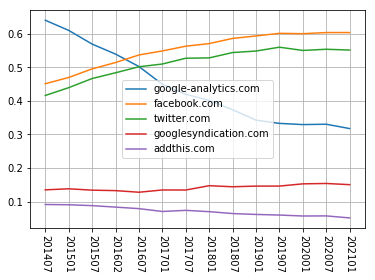

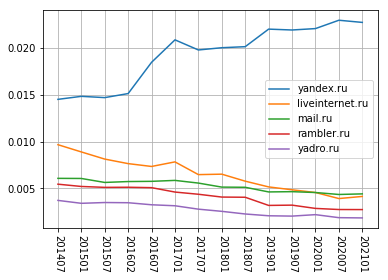

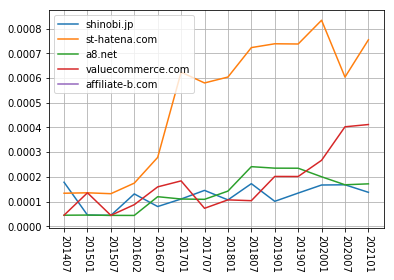

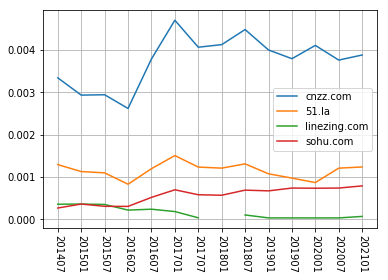

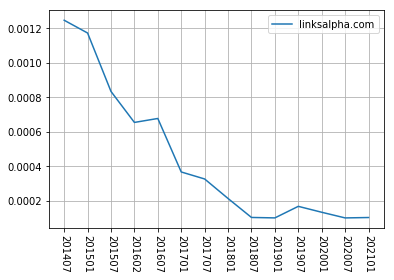

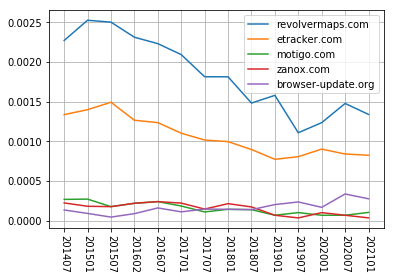

In [22]:
# 画trackers的图
import plotpy.express as px

df = pd.read_csv("edu_df_rate_country.csv")
df.head()


print(df['registration_country'].unique())

countrys = ["US","RU","JP","CN","IN","DE"]

# fig,ax = plt.subplots(3,2)


# for e,country in enumerate(countrys):
#     df_CN = df[df['registration_country'] == country]
#     for _, row in df_CN[:10].iterrows():
#         y_list = [row[i] for i in x]
#     ax[e // 2][e % 2].plot(x,y_list)
#     ax[e // 2][e % 2].xticks(rotation=270)


# for country in countrys:

#     df_CN = df[df['registration_country'] == country]

#     for _, row in df_CN[:5].iterrows():
#         y_list = [row[i] for i in x]
#         plt.plot(x,y_list,label = row['trackers'])
#     plt.xticks(rotation=270)
#     plt.grid(True)
#     plt.legend()
#     plt.show()

In [8]:
### 判断一下各个品类的trackers在

def categorical_trackers(group, trackers_year):
    count = 0
    for domain in group['domain']:
        count += trackers_year[domain]
    return count
# return pd.Series({'tracker_list':group['domain'].to_list()})

df_picture = df_domain[['category','domain']].groupby('category').apply(categorical_trackers,trackers_2021).reset_index()
df_picture.columns = ['category','count']
print(df_picture)
# print(df_domain[['category','domain']].groupby('category').apply(categorical_trackers,trackers_2020).reset_index())
# print(df_domain[['category','domain']].groupby('category').apply(categorical_trackers,trackers_2019).reset_index())
# print(df_domain[['category','domain']].groupby('category').apply(categorical_trackers,trackers_2018).reset_index())
# print(df_domain[['category','domain']].groupby('category').apply(categorical_trackers,trackers_2017).reset_index())

                 category  count
0                       #   1651
1             Advertising   1083
2               Analytics     61
3   Analytics,Advertising      2
4                  Beacon     13
5                 Captcha      0
6         ContentDelivery    146
7           DomainParking      0
8          EmailMarketing      3
9             FormBuilder      0
10                Hosting      0
11            ImageHoster     21
12          LinkShortener     30
13                Malware      0
14                Payment      0
15                Toolbar      0
16                Weather      0
17            WebServices      0
18         WebsiteBuilder      2
19                 Widget    104


In [16]:
# 计算各个网站的glocality

def glocality_cal(l, trackers_count):
    T_w = len(l)
    idf_sim = sum([1 / (trackers_count[t]) for t in l])
    return 1 / T_w * idf_sim

# print(frame_2021.head())
for _,row in frame_2021.iterrows():
    url = row['url']
    trackers_list = row['tracker_list']

    print(glocality_cal(trackers_list, trackers_2021))
# trackers_2021

0.01236260787294645
0.10127877237851662
0.35185185185185186
0.1388888888888889
0.6666666666666666
0.26111111111111107
0.13049395498734429
0.0149726062456602
0.007597532372075441
0.004680556269437947
0.004500414559396918
0.09432060651401997
0.10202020202020201
0.2609903556862762
0.006700676832951416
0.00827419454285432
0.0030838265301411727
0.16792294807370184
0.1
0.018206763717102295
0.004830917874396135
0.14966959365582735
0.00671550851404272
0.18239689205650275
0.10084033613445378
0.06473651914083792
0.011046139155034013
0.03167676090082953
0.004982357586344716
0.03571428571428571
0.045952346600573804
0.10537240681123419
0.003477420548199379
0.010612180248673478
0.05707655364990431
0.0683567025237012
0.02585041418196362
0.021545836644094814
0.006147600609683789
0.020275168364296547
0.21290032642378143
0.0025350537855518
0.3994708994708994
0.5
0.33537422370577313
0.01639344262295082
0.006381223911962519
0.2622537813807589
0.00313904621665019
0.01639344262295082
0.01639344262295082
0.0

In [ ]:
# 计算2021年各个网站的glocality



## 回归分析

对trackers进行回归分析

In [12]:

headlines = frame_2021['trackers'].tolist()
headlines = [headline.split(',') for headline in headlines]
headlines[0:5]

[['facebook.com', 'wikipedia.org'],
 ['wordpress.com',
  'facebook.com',
  'youtube.com',
  'sharethis.com',
  'twitter.com',
  'linkedin.com',
  'bit.ly'],
 ['facebook.com',
  'googlesyndication.com',
  'twitter.com',
  'instagram.com',
  'googleapis.com'],
 ['google.com', 'googleapis.com'],
 ['google.com',
  'facebook.com',
  'youtube.com',
  'reddit.com',
  'googletagservices.com',
  'twitter.com',
  'linkedin.com',
  'icio.us',
  'digg.com']]

In [38]:
unigram_counts = Counter()
for ii, headline in enumerate(headlines):
    if ii % 200 == 0:
        print(f'finished {ii/len(headlines):.2%} of headlines')
    for token in headline:
        unigram_counts[token] += 1

tok2indx = {tok: indx for indx, tok in enumerate(unigram_counts.keys())}

indx2tok = {indx: tok for tok,indx in tok2indx.items()}
print('done')
print('vocabulary size: {}'.format(len(unigram_counts)))
print('most common: {}'.format(unigram_counts.most_common(10)))

df_indx2tok = pd.DataFrame(indx2tok.items(),columns=['id','label'])
df_indx2tok.to_csv("node.csv",index = None)
print(df_indx2tok)


finished 0.00% of headlines
finished 24.10% of headlines
finished 48.19% of headlines
finished 72.29% of headlines
finished 96.39% of headlines
done
vocabulary size: 185
most common: [('facebook.com', 453), ('twitter.com', 432), ('youtube.com', 282), ('google.com', 266), ('instagram.com', 200), ('linkedin.com', 198), ('googleapis.com', 107), ('cloudflare.com', 75), ('googlesyndication.com', 64), ('creativecommons.org', 51)]
      id                    label
0      0             facebook.com
1      1            wikipedia.org
2      2            wordpress.com
3      3              youtube.com
4      4            sharethis.com
5      5              twitter.com
6      6             linkedin.com
7      7                   bit.ly
8      8    googlesyndication.com
9      9            instagram.com
10    10           googleapis.com
11    11               google.com
12    12               reddit.com
13    13    googletagservices.com
14    14                  icio.us
15    15                 dig

In [1]:
# Skipgrams

back_window = 2
front_window = 2

skipgram_counts = Counter()
for iheadline, headline in enumerate(headlines):
    tokens = [tok2indx[tok] for tok in headline]
    for ii_word, word in enumerate(tokens):
        ii_context_min = max(0, ii_word - back_window)
        ii_context_max = min(len(headline) - 1, ii_word + front_window)
        ii_contexts = [
            ii for ii in range(ii_context_min, ii_context_max + 1) 
            if ii != ii_word]
        for ii_context in ii_contexts:
            skipgram = (tokens[ii_word], tokens[ii_context])
            skipgram_counts[skipgram] += 1    
    if iheadline % 200 == 0:
        print(f'finished {iheadline/len(headlines):.2%} of headlines')
        
print('done')
print('number of skipgrams: {}'.format(len(skipgram_counts)))
most_common = [
    (indx2tok[sg[0][0]], indx2tok[sg[0][1]], sg[1]) 
    for sg in skipgram_counts.most_common(20)]
print('most common: {}'.format(most_common))

edge_list = [(sg[0],sg[1],skipgram_counts[sg]) for sg in skipgram_counts]
print(edge_list[:5])
df_picture = pd.DataFrame(edge_list,columns=['Source','Target','weight'])
df_picture.to_csv("edu_trackers_occurrence.csv",index = None)
print(df_picture.head())


NameError: name 'Counter' is not defined